# ＜概要＞

今回は、SIGNATEの【練習問題】鋳造製品の欠陥検出（ https://signate.jp/competitions/406/data ）を取り組み、授業内で用いた手法で学習モデルを作成し、モデル精度向上に努めた。

本課題の学習モデルの評価は、以下の＜ソースコード＞の学習評価の項と、SIGNATE上でのスコアから行うものとした。

また、データセットはSIGNATEから提供されているものを用いて、まずはベースラインの作成に取り組んだ。

データセットは、学習用画像データ (train_data.zip)、評価用画像データ (test_data.zip)の画像データセット、学習用画像データとラベルの対応表 (train.csv)、応募用サンプルファイル (sample_submission.csv)によって構成されており、各画像データとラベル対応表を用いて学習させるものになっていた。

train_data、及びtest_dataでは正常・異常クラスのものが混在しており、今回は学習モデルの出力パターンが2つであったため、本来は2値分類であるが、多値分類を用いて学習させることとした。

ベースラインでは、従来通り水増しした学習データをX_train,y_train、X_test,y_testに分割し、それぞれCNNモデルに学習させ、評価を行った。
その結果、SIGNATE上で「0.85」のスコアを取得した。このスコアは、モデルに学習させたデータの少なさが引き起こした過学習が原因であった。

その後ベースラインより、モデル改善に努めた。

まず、学習データの水増しによる改善に努めた。
その結果、SIGNATE上で「0.97」のスコアを取得した。このスコアは、全体で3位タイの評価であり、まだ改善の余地があると思われた。

次に、学習モデルを転移学習による改善に努めた。
その結果、SIGNATE上で「0.99」のスコアを取得した。このスコアは、全体で1位タイの評価であり、当初のモデル評価の向上を達成する事ができた。

#＜ソースコード＞

#ベースライン

##データ取得、データ概要確認

In [ ]:
#画像格納先に切り替え#
%cd /画像

In [ ]:
import zipfile
train_data = zipfile.ZipFile('train_data.zip')
train_data.namelist() # zip内のファイル名一覧を取得
train_data.extractall() # zip内容を出力

test_data = zipfile.ZipFile('test_data.zip')
test_data.namelist() # zip内のファイル名一覧を取得
test_data.extractall()

In [ ]:
ls

 cnn_da_do/                       test_data/
 __MACOSX/                        test_data.zip
 sample_submission.csv            train.csv
 submit2.csv                      train_data/
 submit.csv                       train_data.zip
'submit_data augumentation.csv'   深層学習_最終課題.ipynb
 submit_ResNet50.csv


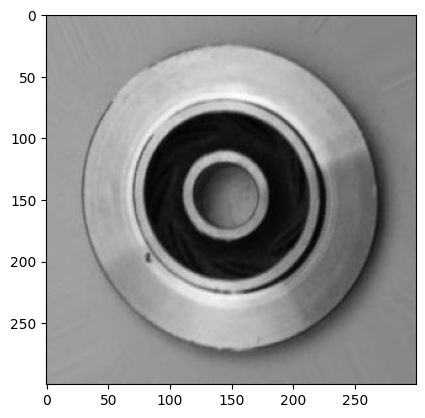

In [ ]:
#イメージ取得
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/画像/train_data/cast_def_0_0.jpeg')
imgplot = plt.imshow(img)

In [ ]:
#csvデータからpandasのデータフレームを取得
import numpy as np
import pandas as pd
train = pd.read_csv("train.csv")

train['target']=train['target'].astype(str) #あとで使うflow_from_dataframeがy_colがstrでないとエラーが出るため変換
train.head()

,id,target
0,cast_def_0_335.jpeg,0
1,cast_def_0_323.jpeg,0
2,cast_def_0_61.jpeg,0
3,cast_def_0_163.jpeg,0
4,cast_def_0_175.jpeg,0


In [ ]:
#データフレームからリスト情報を取得
id_list = train['id'].to_list()
target_list = train['target'].to_list()

images = []
target_label = []

In [ ]:
import cv2

for (path,t) in zip(id_list,target_list):
    img = cv2.imread('./train_data/'+path)
    if img is not None:
        dst = cv2.resize(img, dsize=(200, 200))
        im_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

        images.append(im_rgb.astype(np.float32))
        target_label.append(t)

    else:
        print(path+' : Failed to load.')


np_image = np.array(images)

# 画像とラベルの照合
if len(np_image) == len(target_label):
    print('Successfully loaded.')
else:
    print('Different array lengths.')

Successfully loaded.


###ラベル確認

In [ ]:
target_label

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1'

In [ ]:
import numpy as np
len(target_label)

250

In [ ]:
np_image

array([[[[143., 143., 143.],
         [143., 143., 143.],
         [144., 144., 144.],
         ...,
         [170., 170., 170.],
         [170., 170., 170.],
         [170., 170., 170.]],

        [[143., 143., 143.],
         [143., 143., 143.],
         [143., 143., 143.],
         ...,
         [170., 170., 170.],
         [170., 170., 170.],
         [170., 170., 170.]],

        [[142., 142., 142.],
         [143., 143., 143.],
         [143., 143., 143.],
         ...,
         [170., 170., 170.],
         [170., 170., 170.],
         [170., 170., 170.]],

        ...,

        [[153., 153., 153.],
         [152., 152., 152.],
         [151., 151., 151.],
         ...,
         [185., 185., 185.],
         [185., 185., 185.],
         [185., 185., 185.]],

        [[154., 154., 154.],
         [152., 152., 152.],
         [151., 151., 151.],
         ...,
         [185., 185., 185.],
         [185., 185., 185.],
         [185., 185., 185.]],

        [[154., 154., 154.],
       

##学習準備

In [ ]:
import tensorflow as tf
#乱数の種の初期化
tf.keras.backend.clear_session()
tf.random.set_seed(123)
np.random.seed(35)

In [ ]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

num_classes = 2
im_rows = 200
im_cols = 200
in_shape = (im_rows, im_cols, 3)

# 評価用に分ける
X_train, X_test,y_train, y_test = train_test_split(np_image, target_label, train_size = 0.85)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

# 正規化
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# One-Hotに変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

212
212
38
38


##学習モデルの設定

In [ ]:
#CNNの構成
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()  #NN構成情報

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [ ]:
# モデルをコンパイル
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
callbacks_list = [
                  tf.keras.callbacks.ModelCheckpoint(filepath="cnn_da_do", save_best_only=True, monitor="val_loss")  # 一番よいモデルを保存
                  ]

In [ ]:
#学習
%%time
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test,y_test), callbacks=callbacks_list)

Epoch 1/200
4/4 [==============================] - ETA: 0s - loss: 6.2903 - accuracy: 0.4811

4/4 [==============================] - 12s 2s/step - loss: 6.2903 - accuracy: 0.4811 - val_loss: 1.2700 - val_accuracy: 0.3684
Epoch 2/200
3/4 [=====================>........] - ETA: 0s - loss: 0.9452 - accuracy: 0.4167

4/4 [==============================] - 3s 847ms/step - loss: 0.9211 - accuracy: 0.4434 - val_loss: 0.6703 - val_accuracy: 0.6316
Epoch 3/200
3/4 [=====================>........] - ETA: 0s - loss: 0.6752 - accuracy: 0.5990

4/4 [==============================] - 9s 3s/step - loss: 0.6770 - accuracy: 0.5943 - val_loss: 0.6648 - val_accuracy: 0.6316
Epoch 4/200
3/4 [=====================>........] - ETA: 0s - loss: 0.6756 - accuracy: 0.5990

4/4 [==============================] - 2s 807ms/step - loss: 0.6769 - accuracy: 0.5943 - val_loss: 0.6641 - val_accuracy: 0.6316
Epoch 5/200
3/4 [=====================>........] - ETA: 0s - loss: 0.6745 - accuracy: 0.5885

4/4 [==============================] - 3s 1s/step - loss: 0.6724 - accuracy: 0.5943 - val_loss: 0.6570 - val_accuracy: 0.6316
Epoch 6/200
3/4 [=====================>........] - ETA: 0s - loss: 0.6621 - accuracy: 0.6042

4/4 [==============================] - 5s 2s/step - loss: 0.6671 - accuracy: 0.5943 - val_loss: 0.6484 - val_accuracy: 0.6316
Epoch 7/200
3/4 [=====================>........] - ETA: 0s - loss: 0.6602 - accuracy: 0.5885

4/4 [==============================] - 3s 928ms/step - loss: 0.6585 - accuracy: 0.5943 - val_loss: 0.6405 - val_accuracy: 0.6316
Epoch 8/200
3/4 [=====================>........] - ETA: 0s - loss: 0.6520 - accuracy: 0.6146

4/4 [==============================] - 3s 1s/step - loss: 0.6587 - accuracy: 0.5943 - val_loss: 0.6399 - val_accuracy: 0.7105
Epoch 9/200
4/4 [==============================] - ETA: 0s - loss: 0.6461 - accuracy: 0.7028

4/4 [==============================] - 5s 2s/step - loss: 0.6461 - accuracy: 0.7028 - val_loss: 0.6365 - val_accuracy: 0.7368
Epoch 10/200
4/4 [==============================] - ETA: 0s - loss: 0.6262 - accuracy: 0.6651

4/4 [==============================] - 2s 763ms/step - loss: 0.6262 - accuracy: 0.6651 - val_loss: 0.5883 - val_accuracy: 0.7105
Epoch 11/200
3/4 [=====================>........] - ETA: 0s - loss: 0.5864 - accuracy: 0.6615

4/4 [==============================] - 3s 1s/step - loss: 0.5824 - accuracy: 0.6698 - val_loss: 0.5870 - val_accuracy: 0.6842
Epoch 12/200
3/4 [=====================>........] - ETA: 0s - loss: 0.5415 - accuracy: 0.7448

4/4 [==============================] - 3s 836ms/step - loss: 0.5478 - accuracy: 0.7311 - val_loss: 0.5828 - val_accuracy: 0.7105
Epoch 13/200
4/4 [==============================] - 0s 69ms/step - loss: 0.4898 - accuracy: 0.7877 - val_loss: 0.6142 - val_accuracy: 0.7368
Epoch 14/200
3/4 [=====================>........] - ETA: 0s - loss: 0.4971 - accuracy: 0.7188

4/4 [==============================] - 3s 1s/step - loss: 0.5089 - accuracy: 0.7217 - val_loss: 0.5655 - val_accuracy: 0.6579
Epoch 15/200
4/4 [==============================] - ETA: 0s - loss: 0.4357 - accuracy: 0.7925

4/4 [==============================] - 4s 1s/step - loss: 0.4357 - accuracy: 0.7925 - val_loss: 0.5039 - val_accuracy: 0.7632
Epoch 16/200
4/4 [==============================] - 0s 70ms/step - loss: 0.4674 - accuracy: 0.7453 - val_loss: 0.5415 - val_accuracy: 0.7895
Epoch 17/200
4/4 [==============================] - 0s 65ms/step - loss: 0.4362 - accuracy: 0.8066 - val_loss: 0.6125 - val_accuracy: 0.6053
Epoch 18/200
4/4 [==============================] - 0s 54ms/step - loss: 0.4297 - accuracy: 0.7972 - val_loss: 0.5333 - val_accuracy: 0.7895
Epoch 19/200
4/4 [==============================] - 0s 53ms/step - loss: 0.3663 - accuracy: 0.8349 - val_loss: 0.5649 - val_accuracy: 0.7105
Epoch 20/200
4/4 [==============================] - 0s 56ms/step - loss: 0.3499 - accuracy: 0.8679 - val_loss: 0.5205 - val_accuracy: 0.7632
Epoch 21/200
3/4 [=====================>........] - ETA: 0s - loss: 0.3109 - accuracy: 0.8750

4/4 [==============================] - 2s 761ms/step - loss: 0.3123 - accuracy: 0.8774 - val_loss: 0.4813 - val_accuracy: 0.7895
Epoch 22/200
4/4 [==============================] - 0s 66ms/step - loss: 0.2946 - accuracy: 0.8585 - val_loss: 0.5604 - val_accuracy: 0.7105
Epoch 23/200
4/4 [==============================] - 0s 60ms/step - loss: 0.3218 - accuracy: 0.8302 - val_loss: 0.5315 - val_accuracy: 0.7368
Epoch 24/200
4/4 [==============================] - 0s 63ms/step - loss: 0.2820 - accuracy: 0.8726 - val_loss: 0.4988 - val_accuracy: 0.8158
Epoch 25/200
4/4 [==============================] - 0s 60ms/step - loss: 0.2271 - accuracy: 0.9340 - val_loss: 0.5059 - val_accuracy: 0.8158
Epoch 26/200
4/4 [==============================] - 0s 53ms/step - loss: 0.2066 - accuracy: 0.9245 - val_loss: 0.6866 - val_accuracy: 0.7105
Epoch 27/200
4/4 [==============================] - 0s 56ms/step - loss: 0.2477 - accuracy: 0.8774 - val_loss: 0.5624 - val_accuracy: 0.8421
Epoch 28/200
4/4 [=======

###学習評価

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

2/2 [==============================] - 0s 98ms/step - loss: 1.4158 - accuracy: 0.8684


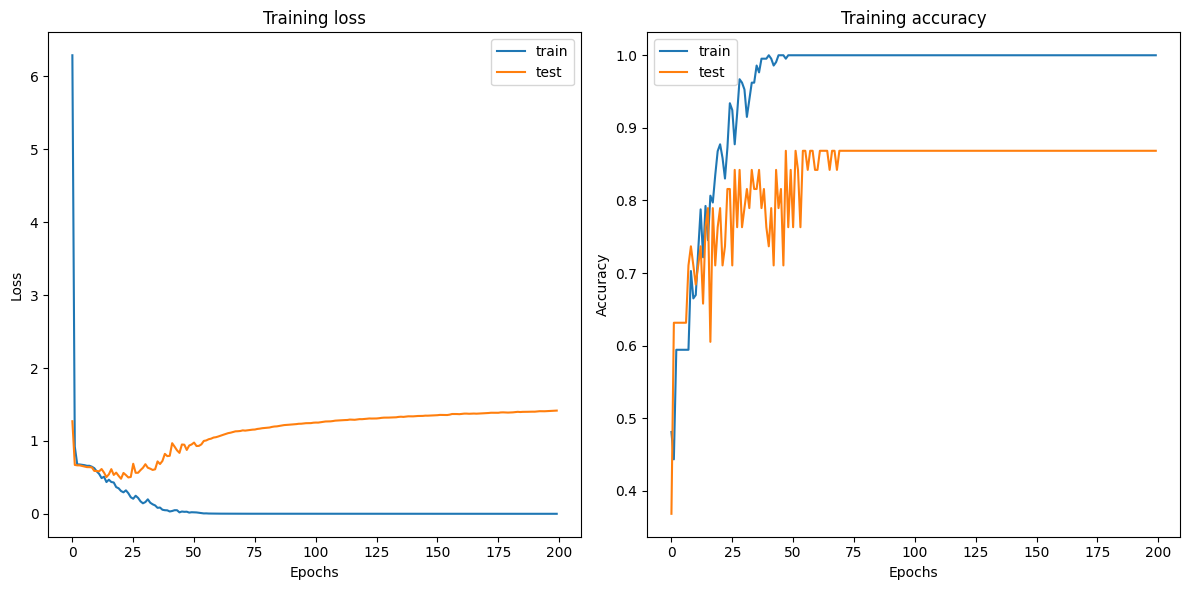

In [ ]:
#学習状況のプロット
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs = range(len(loss))

fig,axes = plt.subplots(figsize=(12,6),nrows=1,ncols=2,tight_layout=True)
axes[0].plot(epochs,loss,label="train")
axes[0].plot(epochs,val_loss,label="test")
axes[0].set(xlabel="Epochs",ylabel="Loss",title="Training loss")
axes[0].legend()
axes[1].plot(epochs,acc,label="train")
axes[1].plot(epochs,val_acc,label="test")
axes[1].set(xlabel="Epochs",ylabel="Accuracy",title="Training accuracy")
axes[1].legend()

##testデータで実行

In [ ]:
import cv2
import numpy as np
import glob
import re

# glob.globの結果をソートする。
# https://teshi-learn.com/2021-04/python-glob-glob-sorted/
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

files = sorted(glob.glob("/content/drive/MyDrive/3年生 前期/深層学習/期末課題/画像/test_data/*jpeg"), key=natural_keys)

ans_csv = ""
for file in files:
    im = cv2.imread(file)
    im = cv2.resize(im, (200, 200))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = im.reshape(in_shape).astype('float32') / 255

    r = model.predict(np.array([im]), batch_size=32,verbose=0)
    res = r[0]

    filename = file.replace('/content/drive/MyDrive/3年生 前期/深層学習/期末課題/画像/test_data/','')
    # 回答csvを作る
    ans_csv+='{},{}\n'.format(filename,str(res.argmax()))

# print(ans_csv)

with open('./submit_base.csv', mode='w') as f:
    f.write(ans_csv)
    print('submit_base.csv output completed')

submit_base.csv output completed


##結果・考察

出力結果の評価は以下に添付した。

今回のモデルは損失率: 1.4158、正答率: 0.8684に収まり、グラフからも分かりやすいように過学習を引き起こしていた。

callbackにて、部分的に過学習の防止を行っていたこと、ラベルの総数から考えるに、学習データの少なさが原因であると考えられる。

実際、データは250件しかなく、その内、212件を学習し、38件を検証用にまわした為、学習件数が少ないことが分かった。

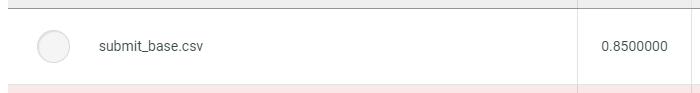



---



#改善

上記のベースラインを踏まえ、改善策を模索した。

##データの水増し

学習データの少なさを補うべく、データの水増しを行った。
今回は画像データが正方形であるため、回転角を90°の倍数に限りrotate,flipにて画像データの加工を行った。

In [ ]:
#データフレームからリスト情報を取得
id_list = train['id'].to_list()
target_list = train['target'].to_list()

images = []
target_label = []

In [ ]:
import cv2

for (path,t) in zip(id_list,target_list):
    img = cv2.imread('./train_data/'+path)
    if img is not None:
        dst = cv2.resize(img, dsize=(200, 200))
        im_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

        images.append(im_rgb.astype(np.float32))
        target_label.append(t)

        rot90_r = cv2.rotate(im_rgb, cv2.ROTATE_90_CLOCKWISE)
        images.append(rot90_r.astype(np.float32))
        target_label.append(t)

        rot90_l = cv2.rotate(im_rgb, cv2.ROTATE_90_COUNTERCLOCKWISE)
        images.append(rot90_l.astype(np.float32))
        target_label.append(t)

        rot180 = cv2.rotate(im_rgb, cv2.ROTATE_180)
        images.append(rot180.astype(np.float32))
        target_label.append(t)

        img_flip_lr = cv2.flip(im_rgb, 1)
        images.append(img_flip_lr.astype(np.float32))
        target_label.append(t)

    else:
        print(path+' : Failed to load.')


np_image = np.array(images)

# 画像とラベルの照合
if len(np_image) == len(target_label):
    print('Successfully loaded.')
else:
    print('Different array lengths.')

Successfully loaded.


####ラベル確認

In [ ]:
target_label

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

In [ ]:
import numpy as np
len(target_label)

1250

In [ ]:
np_image

array([[[[143., 143., 143.],
         [143., 143., 143.],
         [144., 144., 144.],
         ...,
         [170., 170., 170.],
         [170., 170., 170.],
         [170., 170., 170.]],

        [[143., 143., 143.],
         [143., 143., 143.],
         [143., 143., 143.],
         ...,
         [170., 170., 170.],
         [170., 170., 170.],
         [170., 170., 170.]],

        [[142., 142., 142.],
         [143., 143., 143.],
         [143., 143., 143.],
         ...,
         [170., 170., 170.],
         [170., 170., 170.],
         [170., 170., 170.]],

        ...,

        [[153., 153., 153.],
         [152., 152., 152.],
         [151., 151., 151.],
         ...,
         [185., 185., 185.],
         [185., 185., 185.],
         [185., 185., 185.]],

        [[154., 154., 154.],
         [152., 152., 152.],
         [151., 151., 151.],
         ...,
         [185., 185., 185.],
         [185., 185., 185.],
         [185., 185., 185.]],

        [[154., 154., 154.],
       

###学習準備

In [ ]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

num_classes = 2
im_rows = 200
im_cols = 200
in_shape = (im_rows, im_cols, 3)

# 評価用に分ける
X_train, X_test,y_train, y_test = train_test_split(np_image, target_label, train_size = 0.85)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

# 正規化
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# One-Hotに変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

1062
1062
188
188


###学習モデルの設定

In [ ]:
#CNNの構成
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()  #NN構成情報

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 64)      

In [ ]:
# モデルをコンパイル
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
callbacks_list = [
                  tf.keras.callbacks.ModelCheckpoint(filepath="cnn_da_do", save_best_only=True, monitor="val_loss")  # 一番よいモデルを保存
                  ]

In [ ]:
#学習
%%time
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test,y_test), callbacks=callbacks_list)

Epoch 1/200
17/17 [==============================] - ETA: 0s - loss: 1.6362 - accuracy: 0.5631

17/17 [==============================] - 15s 709ms/step - loss: 1.6362 - accuracy: 0.5631 - val_loss: 0.6681 - val_accuracy: 0.5904
Epoch 2/200
16/17 [===========================>..] - ETA: 0s - loss: 0.6474 - accuracy: 0.6162

17/17 [==============================] - 4s 223ms/step - loss: 0.6456 - accuracy: 0.6215 - val_loss: 0.6107 - val_accuracy: 0.6489
Epoch 3/200
16/17 [===========================>..] - ETA: 0s - loss: 0.5824 - accuracy: 0.6738

17/17 [==============================] - 3s 183ms/step - loss: 0.5777 - accuracy: 0.6789 - val_loss: 0.5537 - val_accuracy: 0.7447
Epoch 4/200
16/17 [===========================>..] - ETA: 0s - loss: 0.5038 - accuracy: 0.7500

17/17 [==============================] - 3s 171ms/step - loss: 0.4998 - accuracy: 0.7533 - val_loss: 0.5409 - val_accuracy: 0.7128
Epoch 5/200
16/17 [===========================>..] - ETA: 0s - loss: 0.4412 - accuracy: 0.7871

17/17 [==============================] - 5s 302ms/step - loss: 0.4383 - accuracy: 0.7900 - val_loss: 0.4840 - val_accuracy: 0.7394
Epoch 6/200
16/17 [===========================>..] - ETA: 0s - loss: 0.4179 - accuracy: 0.8066

17/17 [==============================] - 3s 165ms/step - loss: 0.4146 - accuracy: 0.8117 - val_loss: 0.4202 - val_accuracy: 0.7926
Epoch 7/200
16/17 [===========================>..] - ETA: 0s - loss: 0.3873 - accuracy: 0.8242

17/17 [==============================] - 3s 171ms/step - loss: 0.3828 - accuracy: 0.8286 - val_loss: 0.3783 - val_accuracy: 0.8138
Epoch 8/200
17/17 [==============================] - ETA: 0s - loss: 0.2942 - accuracy: 0.8814

17/17 [==============================] - 5s 307ms/step - loss: 0.2942 - accuracy: 0.8814 - val_loss: 0.3029 - val_accuracy: 0.8936
Epoch 9/200
16/17 [===========================>..] - ETA: 0s - loss: 0.2537 - accuracy: 0.9150

17/17 [==============================] - 3s 197ms/step - loss: 0.2553 - accuracy: 0.9134 - val_loss: 0.2791 - val_accuracy: 0.9096
Epoch 10/200
17/17 [==============================] - 1s 55ms/step - loss: 0.3081 - accuracy: 0.8569 - val_loss: 0.3371 - val_accuracy: 0.8511
Epoch 11/200
16/17 [===========================>..] - ETA: 0s - loss: 0.2609 - accuracy: 0.8877

17/17 [==============================] - 4s 254ms/step - loss: 0.2609 - accuracy: 0.8879 - val_loss: 0.2577 - val_accuracy: 0.8883
Epoch 12/200
16/17 [===========================>..] - ETA: 0s - loss: 0.2032 - accuracy: 0.9258

17/17 [==============================] - 3s 162ms/step - loss: 0.2028 - accuracy: 0.9266 - val_loss: 0.2448 - val_accuracy: 0.8989
Epoch 13/200
17/17 [==============================] - ETA: 0s - loss: 0.1411 - accuracy: 0.9501

17/17 [==============================] - 3s 193ms/step - loss: 0.1411 - accuracy: 0.9501 - val_loss: 0.1894 - val_accuracy: 0.9096
Epoch 14/200
16/17 [===========================>..] - ETA: 0s - loss: 0.1044 - accuracy: 0.9756

17/17 [==============================] - 3s 182ms/step - loss: 0.1026 - accuracy: 0.9755 - val_loss: 0.1760 - val_accuracy: 0.9415
Epoch 15/200
16/17 [===========================>..] - ETA: 0s - loss: 0.0788 - accuracy: 0.9766

17/17 [==============================] - 4s 242ms/step - loss: 0.0785 - accuracy: 0.9774 - val_loss: 0.1272 - val_accuracy: 0.9628
Epoch 16/200
17/17 [==============================] - 1s 55ms/step - loss: 0.0736 - accuracy: 0.9774 - val_loss: 0.1471 - val_accuracy: 0.9309
Epoch 17/200
17/17 [==============================] - 1s 50ms/step - loss: 0.0838 - accuracy: 0.9708 - val_loss: 0.1532 - val_accuracy: 0.9362
Epoch 18/200
17/17 [==============================] - 1s 50ms/step - loss: 0.0580 - accuracy: 0.9812 - val_loss: 0.1420 - val_accuracy: 0.9574
Epoch 19/200
17/17 [==============================] - 1s 54ms/step - loss: 0.0390 - accuracy: 0.9906 - val_loss: 0.1343 - val_accuracy: 0.9468
Epoch 20/200
16/17 [===========================>..] - ETA: 0s - loss: 0.0261 - accuracy: 0.9941

17/17 [==============================] - 3s 189ms/step - loss: 0.0258 - accuracy: 0.9944 - val_loss: 0.0916 - val_accuracy: 0.9734
Epoch 21/200
16/17 [===========================>..] - ETA: 0s - loss: 0.0157 - accuracy: 1.0000

17/17 [==============================] - 5s 309ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.0811 - val_accuracy: 0.9840
Epoch 22/200
16/17 [===========================>..] - ETA: 0s - loss: 0.0120 - accuracy: 0.9990

17/17 [==============================] - 3s 170ms/step - loss: 0.0119 - accuracy: 0.9991 - val_loss: 0.0808 - val_accuracy: 0.9787
Epoch 23/200
17/17 [==============================] - 1s 60ms/step - loss: 0.0094 - accuracy: 0.9991 - val_loss: 0.1240 - val_accuracy: 0.9734
Epoch 24/200
16/17 [===========================>..] - ETA: 0s - loss: 0.0068 - accuracy: 1.0000

17/17 [==============================] - 3s 182ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0742 - val_accuracy: 0.9787
Epoch 25/200
17/17 [==============================] - 1s 68ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0794 - val_accuracy: 0.9840
Epoch 26/200
17/17 [==============================] - 1s 64ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0991 - val_accuracy: 0.9787
Epoch 27/200
17/17 [==============================] - 1s 58ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0941 - val_accuracy: 0.9787
Epoch 28/200
17/17 [==============================] - 1s 55ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0770 - val_accuracy: 0.9840
Epoch 29/200
17/17 [==============================] - 1s 56ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0847 - val_accuracy: 0.9840
Epoch 30/200
17/17 [==============================] - 1s 51ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0895 - val_accuracy: 0.9840
Epoch 31/20

###学習評価

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

6/6 [==============================] - 1s 65ms/step - loss: 0.1368 - accuracy: 0.9840


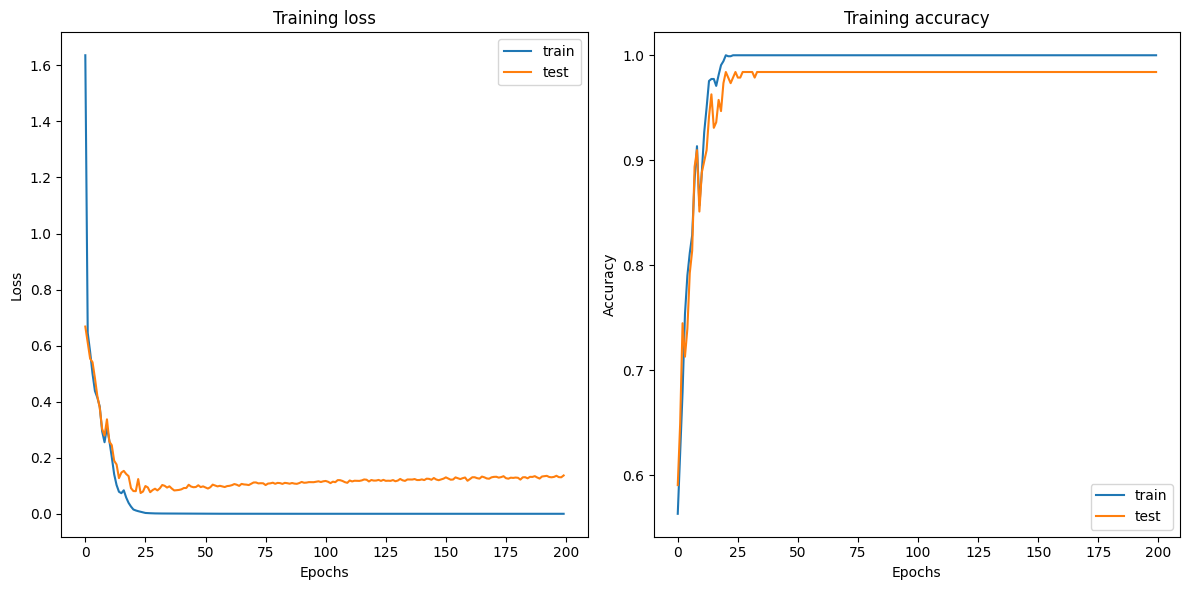

In [ ]:
#学習状況のプロット
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs = range(len(loss))

fig,axes = plt.subplots(figsize=(12,6),nrows=1,ncols=2,tight_layout=True)
axes[0].plot(epochs,loss,label="train")
axes[0].plot(epochs,val_loss,label="test")
axes[0].set(xlabel="Epochs",ylabel="Loss",title="Training loss")
axes[0].legend()
axes[1].plot(epochs,acc,label="train")
axes[1].plot(epochs,val_acc,label="test")
axes[1].set(xlabel="Epochs",ylabel="Accuracy",title="Training accuracy")
axes[1].legend()

###testデータで実行

In [ ]:
import cv2
import numpy as np
import glob
import re

# glob.globの結果をソートする。
# https://teshi-learn.com/2021-04/python-glob-glob-sorted/
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

files = sorted(glob.glob("/画像/test_data/*jpeg"), key=natural_keys)

ans_csv = ""
for file in files:
    im = cv2.imread(file)
    im = cv2.resize(im, (200, 200))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = im.reshape(in_shape).astype('float32') / 255

    r = model.predict(np.array([im]), batch_size=32,verbose=0)
    res = r[0]

    filename = file.replace('/content/drive/MyDrive/3年生 前期/深層学習/期末課題/画像/test_data/','')
    # 回答csvを作る
    ans_csv+='{},{}\n'.format(filename,str(res.argmax()))

# print(ans_csv)

with open('./submit.csv', mode='w') as f:
    f.write(ans_csv)
    print('submit.csv output completed')

submit2.csv output completed


##結果・考察

出力結果の評価は以下の画像に添付した。

ベースラインと比べ、データの水増しに成功し過学習を防ぎ、より精度の高いモデルを作成する事ができた。

だが、0.99, 0.98, 0.97 の評価を同率で取得している人が多く、結果的に順位は微妙になってしまった。

上位を目指すべく、今度はモデル精度を向上させる余地があると考えた。

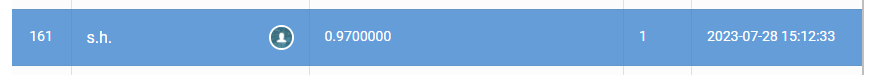



---



## 転移学習

より高いスコアをだすには、データの水増しでは改善に限度があると考え、精度の高い学習モデルを用意する必要があると考えた。

このことを受け、転移学習を行った。

今回はVGG16モデルを用いた実装を行った。

###VGG16モデル

####前処理

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD

#VGG16モデルの読み込み
conv_base = tf.keras.applications.VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))  # VGG16を採用 input_shapeはVGG16のdefault
conv_base.trainable = False  # conv_baseの重みを凍結

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
#正規化前のデータを作成
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

num_classes = 2
im_rows = 200
im_cols = 200
in_shape = (im_rows, im_cols, 3)

Np_image = np.array(np_image).astype("float32")
Target_label = np.array(target_label).astype("int16")

#Target_labelをOne hot encoding する
Target_label = to_categorical(Target_label, num_classes)

# 評価用に分ける
X2_train, X2_test,y2_train, y2_test = train_test_split(Np_image, Target_label, train_size = 0.85)

print(len(X2_train))
print(len(y2_train))
print(len(X2_test))
print(len(y2_test))

1062
1062
188
188


In [ ]:
X2_train.shape

(1062, 200, 200, 3)

In [ ]:
import copy
X_train15=copy.deepcopy(X2_train[15])

In [ ]:
X_train15.max()

247.0

In [ ]:
# VGG16用のデータ前処理
X_train15 = tf.keras.applications.vgg16.preprocess_input(X_train15)

In [ ]:
X_train15

array([[[24.060997 , 11.221001 ,  4.3199997],
        [24.060997 , 11.221001 ,  4.3199997],
        [24.060997 , 11.221001 ,  4.3199997],
        ...,
        [46.060997 , 33.221    , 26.32     ],
        [46.060997 , 33.221    , 26.32     ],
        [52.060997 , 39.221    , 32.32     ]],

       [[23.060997 , 10.221001 ,  3.3199997],
        [23.060997 , 10.221001 ,  3.3199997],
        [23.060997 , 10.221001 ,  3.3199997],
        ...,
        [47.060997 , 34.221    , 27.32     ],
        [49.060997 , 36.221    , 29.32     ],
        [49.060997 , 36.221    , 29.32     ]],

       [[23.060997 , 10.221001 ,  3.3199997],
        [23.060997 , 10.221001 ,  3.3199997],
        [23.060997 , 10.221001 ,  3.3199997],
        ...,
        [48.060997 , 35.221    , 28.32     ],
        [51.060997 , 38.221    , 31.32     ],
        [48.060997 , 35.221    , 28.32     ]],

       ...,

       [[52.060997 , 39.221    , 32.32     ],
        [54.060997 , 41.221    , 34.32     ],
        [56.060997 , 4

In [ ]:
# data augmentation層
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2),
])

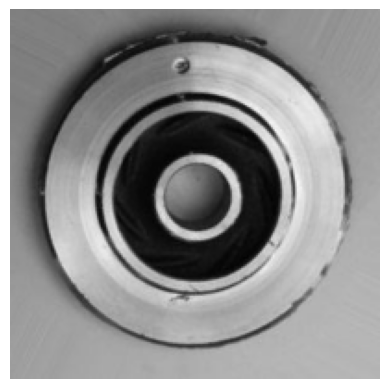

In [ ]:
# 例をひとつ取り出す
x = X2_train[15]
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.axis("off")
ax.imshow(x.astype("uint8"))

###学習モデルの設定

In [ ]:
#モデル構成
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(200,200,3)),
    data_augmentation,  # data augmentation層: 出力のshape=(150,150,3)
    tf.keras.layers.Lambda(lambda x:tf.keras.applications.vgg16.preprocess_input(x)),  # VGG16用の入力表現に変換
    tf.keras.layers.Lambda(lambda x:tf.image.resize(x,(224,224))),  # 入力サイズの調整
    conv_base,  # vgg16の特徴抽出部分
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2,activation="softmax")
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 200, 200, 3)       0         
                                                                 
 lambda (Lambda)             (None, 200, 200, 3)       0         
                                                                 
 lambda_1 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)              

In [ ]:
#modelのコンパイル
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])  #adam optimizer

In [ ]:
# val_accをモニタして、一番よいパラメータを保存、5epochsにわたって変化が無ければ終了
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath="tl_vgg16",save_best_only=True, monitor="val_acc"),
             tf.keras.callbacks.EarlyStopping(monitor="val_acc",patience=5)]

In [ ]:
#実行
%%time
history = model.fit(X2_train, y2_train, epochs=200, batch_size=64, validation_data=(X2_test,y2_test), callbacks=callbacks)

Epoch 1/200
17/17 [==============================] - ETA: 0s - loss: 14.5380 - accuracy: 0.6751

17/17 [==============================] - 36s 1s/step - loss: 14.5380 - accuracy: 0.6751 - val_loss: 4.1775 - val_accuracy: 0.8457
Epoch 2/200
17/17 [==============================] - ETA: 0s - loss: 2.6875 - accuracy: 0.8531

17/17 [==============================] - 5s 324ms/step - loss: 2.6875 - accuracy: 0.8531 - val_loss: 0.3176 - val_accuracy: 0.9521
Epoch 3/200
17/17 [==============================] - ETA: 0s - loss: 0.4487 - accuracy: 0.9303

17/17 [==============================] - 5s 327ms/step - loss: 0.4487 - accuracy: 0.9303 - val_loss: 0.1207 - val_accuracy: 0.9468
Epoch 4/200
17/17 [==============================] - ETA: 0s - loss: 0.1449 - accuracy: 0.9595

17/17 [==============================] - 5s 328ms/step - loss: 0.1449 - accuracy: 0.9595 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 5/200
17/17 [==============================] - ETA: 0s - loss: 0.1174 - accuracy: 0.9670

17/17 [==============================] - 5s 328ms/step - loss: 0.1174 - accuracy: 0.9670 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 6/200
17/17 [==============================] - ETA: 0s - loss: 0.0672 - accuracy: 0.9793

17/17 [==============================] - 5s 325ms/step - loss: 0.0672 - accuracy: 0.9793 - val_loss: 0.0202 - val_accuracy: 0.9947
Epoch 7/200
17/17 [==============================] - ETA: 0s - loss: 0.0689 - accuracy: 0.9746

17/17 [==============================] - 5s 292ms/step - loss: 0.0689 - accuracy: 0.9746 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 8/200
17/17 [==============================] - ETA: 0s - loss: 0.0662 - accuracy: 0.9774

17/17 [==============================] - 6s 329ms/step - loss: 0.0662 - accuracy: 0.9774 - val_loss: 0.0096 - val_accuracy: 0.9947
Epoch 9/200
17/17 [==============================] - ETA: 0s - loss: 0.0596 - accuracy: 0.9840

17/17 [==============================] - 6s 328ms/step - loss: 0.0596 - accuracy: 0.9840 - val_loss: 0.0284 - val_accuracy: 0.9947
Epoch 10/200
17/17 [==============================] - ETA: 0s - loss: 0.0816 - accuracy: 0.9708

17/17 [==============================] - 5s 300ms/step - loss: 0.0816 - accuracy: 0.9708 - val_loss: 0.0097 - val_accuracy: 0.9947
Epoch 11/200
17/17 [==============================] - ETA: 0s - loss: 0.0534 - accuracy: 0.9831

17/17 [==============================] - 6s 334ms/step - loss: 0.0534 - accuracy: 0.9831 - val_loss: 0.0121 - val_accuracy: 0.9947
Epoch 12/200
17/17 [==============================] - ETA: 0s - loss: 0.0389 - accuracy: 0.9859

17/17 [==============================] - 6s 329ms/step - loss: 0.0389 - accuracy: 0.9859 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 13/200
17/17 [==============================] - ETA: 0s - loss: 0.0680 - accuracy: 0.9802

17/17 [==============================] - 6s 334ms/step - loss: 0.0680 - accuracy: 0.9802 - val_loss: 0.0108 - val_accuracy: 0.9947
Epoch 14/200
17/17 [==============================] - ETA: 0s - loss: 0.0305 - accuracy: 0.9896

17/17 [==============================] - 5s 296ms/step - loss: 0.0305 - accuracy: 0.9896 - val_loss: 0.0083 - val_accuracy: 0.9947
Epoch 15/200
17/17 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9868

17/17 [==============================] - 6s 331ms/step - loss: 0.0424 - accuracy: 0.9868 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 16/200
17/17 [==============================] - ETA: 0s - loss: 0.0359 - accuracy: 0.9887

17/17 [==============================] - 6s 336ms/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 17/200
17/17 [==============================] - ETA: 0s - loss: 0.0393 - accuracy: 0.9878

17/17 [==============================] - 6s 333ms/step - loss: 0.0393 - accuracy: 0.9878 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 18/200
17/17 [==============================] - ETA: 0s - loss: 0.0363 - accuracy: 0.9906

17/17 [==============================] - 6s 337ms/step - loss: 0.0363 - accuracy: 0.9906 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 19/200
17/17 [==============================] - ETA: 0s - loss: 0.0532 - accuracy: 0.9802

17/17 [==============================] - 6s 334ms/step - loss: 0.0532 - accuracy: 0.9802 - val_loss: 6.0697e-04 - val_accuracy: 1.0000
Epoch 20/200
17/17 [==============================] - ETA: 0s - loss: 0.0466 - accuracy: 0.9849

17/17 [==============================] - 6s 336ms/step - loss: 0.0466 - accuracy: 0.9849 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 21/200
17/17 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9840

17/17 [==============================] - 6s 337ms/step - loss: 0.0422 - accuracy: 0.9840 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 22/200
17/17 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9831

17/17 [==============================] - 6s 334ms/step - loss: 0.0493 - accuracy: 0.9831 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 23/200
17/17 [==============================] - ETA: 0s - loss: 0.0510 - accuracy: 0.9868

17/17 [==============================] - 6s 342ms/step - loss: 0.0510 - accuracy: 0.9868 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 24/200
17/17 [==============================] - ETA: 0s - loss: 0.0606 - accuracy: 0.9831

17/17 [==============================] - 6s 337ms/step - loss: 0.0606 - accuracy: 0.9831 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 25/200
17/17 [==============================] - ETA: 0s - loss: 0.0381 - accuracy: 0.9896

17/17 [==============================] - 5s 304ms/step - loss: 0.0381 - accuracy: 0.9896 - val_loss: 4.2447e-04 - val_accuracy: 1.0000
Epoch 26/200
17/17 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 0.9934

17/17 [==============================] - 6s 340ms/step - loss: 0.0306 - accuracy: 0.9934 - val_loss: 2.3498e-04 - val_accuracy: 1.0000
Epoch 27/200
17/17 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9896

17/17 [==============================] - 6s 336ms/step - loss: 0.0352 - accuracy: 0.9896 - val_loss: 8.1636e-04 - val_accuracy: 1.0000
Epoch 28/200
17/17 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9887

17/17 [==============================] - 6s 343ms/step - loss: 0.0211 - accuracy: 0.9887 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 29/200
17/17 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 0.9906

17/17 [==============================] - 5s 305ms/step - loss: 0.0474 - accuracy: 0.9906 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 30/200
17/17 [==============================] - ETA: 0s - loss: 0.0456 - accuracy: 0.9831

17/17 [==============================] - 5s 307ms/step - loss: 0.0456 - accuracy: 0.9831 - val_loss: 0.0057 - val_accuracy: 0.9947
Epoch 31/200
17/17 [==============================] - ETA: 0s - loss: 0.0586 - accuracy: 0.9821

17/17 [==============================] - 5s 308ms/step - loss: 0.0586 - accuracy: 0.9821 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 32/200
17/17 [==============================] - ETA: 0s - loss: 0.0246 - accuracy: 0.9896

17/17 [==============================] - 6s 339ms/step - loss: 0.0246 - accuracy: 0.9896 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 33/200
17/17 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9934

17/17 [==============================] - 6s 344ms/step - loss: 0.0173 - accuracy: 0.9934 - val_loss: 7.3027e-04 - val_accuracy: 1.0000
Epoch 34/200
17/17 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9925

17/17 [==============================] - 5s 308ms/step - loss: 0.0254 - accuracy: 0.9925 - val_loss: 4.9623e-04 - val_accuracy: 1.0000
Epoch 35/200
17/17 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9840

17/17 [==============================] - 5s 309ms/step - loss: 0.0427 - accuracy: 0.9840 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 36/200
17/17 [==============================] - ETA: 0s - loss: 0.0511 - accuracy: 0.9859

17/17 [==============================] - 6s 344ms/step - loss: 0.0511 - accuracy: 0.9859 - val_loss: 9.0902e-04 - val_accuracy: 1.0000
Epoch 37/200
17/17 [==============================] - ETA: 0s - loss: 0.0272 - accuracy: 0.9934

17/17 [==============================] - 6s 342ms/step - loss: 0.0272 - accuracy: 0.9934 - val_loss: 0.0238 - val_accuracy: 0.9840
Epoch 38/200
17/17 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9859

17/17 [==============================] - 6s 345ms/step - loss: 0.0417 - accuracy: 0.9859 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 39/200
17/17 [==============================] - ETA: 0s - loss: 0.0282 - accuracy: 0.9887

17/17 [==============================] - 5s 311ms/step - loss: 0.0282 - accuracy: 0.9887 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 40/200
17/17 [==============================] - ETA: 0s - loss: 0.0344 - accuracy: 0.9840

17/17 [==============================] - 5s 319ms/step - loss: 0.0344 - accuracy: 0.9840 - val_loss: 0.0227 - val_accuracy: 0.9947
Epoch 41/200
17/17 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9840

17/17 [==============================] - 6s 358ms/step - loss: 0.0415 - accuracy: 0.9840 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 42/200
17/17 [==============================] - ETA: 0s - loss: 0.0372 - accuracy: 0.9868

17/17 [==============================] - 6s 359ms/step - loss: 0.0372 - accuracy: 0.9868 - val_loss: 2.5352e-04 - val_accuracy: 1.0000
Epoch 43/200
17/17 [==============================] - ETA: 0s - loss: 0.0714 - accuracy: 0.9793

17/17 [==============================] - 6s 335ms/step - loss: 0.0714 - accuracy: 0.9793 - val_loss: 2.6343e-04 - val_accuracy: 1.0000
Epoch 44/200
17/17 [==============================] - ETA: 0s - loss: 0.0721 - accuracy: 0.9746

17/17 [==============================] - 5s 314ms/step - loss: 0.0721 - accuracy: 0.9746 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 45/200
17/17 [==============================] - ETA: 0s - loss: 0.0502 - accuracy: 0.9831

17/17 [==============================] - 6s 345ms/step - loss: 0.0502 - accuracy: 0.9831 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 46/200
17/17 [==============================] - ETA: 0s - loss: 0.0933 - accuracy: 0.9746

17/17 [==============================] - 6s 345ms/step - loss: 0.0933 - accuracy: 0.9746 - val_loss: 7.0200e-04 - val_accuracy: 1.0000
Epoch 47/200
17/17 [==============================] - ETA: 0s - loss: 0.0300 - accuracy: 0.9887

17/17 [==============================] - 5s 313ms/step - loss: 0.0300 - accuracy: 0.9887 - val_loss: 0.0066 - val_accuracy: 0.9947
Epoch 48/200
17/17 [==============================] - ETA: 0s - loss: 0.0459 - accuracy: 0.9849

17/17 [==============================] - 5s 316ms/step - loss: 0.0459 - accuracy: 0.9849 - val_loss: 5.8741e-04 - val_accuracy: 1.0000
Epoch 49/200
17/17 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9849

17/17 [==============================] - 6s 343ms/step - loss: 0.0426 - accuracy: 0.9849 - val_loss: 0.0045 - val_accuracy: 0.9947
Epoch 50/200
17/17 [==============================] - ETA: 0s - loss: 0.0389 - accuracy: 0.9906

17/17 [==============================] - 6s 347ms/step - loss: 0.0389 - accuracy: 0.9906 - val_loss: 5.8916e-04 - val_accuracy: 1.0000
Epoch 51/200
17/17 [==============================] - ETA: 0s - loss: 0.0267 - accuracy: 0.9934

17/17 [==============================] - 6s 344ms/step - loss: 0.0267 - accuracy: 0.9934 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 52/200
17/17 [==============================] - ETA: 0s - loss: 0.0455 - accuracy: 0.9840

17/17 [==============================] - 5s 314ms/step - loss: 0.0455 - accuracy: 0.9840 - val_loss: 2.9151e-05 - val_accuracy: 1.0000
Epoch 53/200
17/17 [==============================] - ETA: 0s - loss: 0.0391 - accuracy: 0.9868

17/17 [==============================] - 5s 316ms/step - loss: 0.0391 - accuracy: 0.9868 - val_loss: 3.0817e-04 - val_accuracy: 1.0000
Epoch 54/200
17/17 [==============================] - ETA: 0s - loss: 0.0367 - accuracy: 0.9887

17/17 [==============================] - 6s 345ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 2.5582e-04 - val_accuracy: 1.0000
Epoch 55/200
17/17 [==============================] - ETA: 0s - loss: 0.0295 - accuracy: 0.9915

17/17 [==============================] - 6s 350ms/step - loss: 0.0295 - accuracy: 0.9915 - val_loss: 0.0118 - val_accuracy: 0.9947
Epoch 56/200
17/17 [==============================] - ETA: 0s - loss: 0.0541 - accuracy: 0.9793

17/17 [==============================] - 6s 345ms/step - loss: 0.0541 - accuracy: 0.9793 - val_loss: 1.0353e-04 - val_accuracy: 1.0000
Epoch 57/200
17/17 [==============================] - ETA: 0s - loss: 0.0267 - accuracy: 0.9915

17/17 [==============================] - 6s 347ms/step - loss: 0.0267 - accuracy: 0.9915 - val_loss: 1.0420e-04 - val_accuracy: 1.0000
Epoch 58/200
17/17 [==============================] - ETA: 0s - loss: 0.0284 - accuracy: 0.9925

17/17 [==============================] - 6s 346ms/step - loss: 0.0284 - accuracy: 0.9925 - val_loss: 3.6373e-05 - val_accuracy: 1.0000
Epoch 59/200
17/17 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 0.9812

17/17 [==============================] - 6s 344ms/step - loss: 0.0474 - accuracy: 0.9812 - val_loss: 8.8784e-04 - val_accuracy: 1.0000
Epoch 60/200
17/17 [==============================] - ETA: 0s - loss: 0.0286 - accuracy: 0.9878

17/17 [==============================] - 6s 348ms/step - loss: 0.0286 - accuracy: 0.9878 - val_loss: 1.3550e-04 - val_accuracy: 1.0000
Epoch 61/200
17/17 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9934

17/17 [==============================] - 6s 345ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 62/200
17/17 [==============================] - ETA: 0s - loss: 0.0377 - accuracy: 0.9878

17/17 [==============================] - 5s 317ms/step - loss: 0.0377 - accuracy: 0.9878 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 63/200
17/17 [==============================] - ETA: 0s - loss: 0.0752 - accuracy: 0.9868

17/17 [==============================] - 6s 345ms/step - loss: 0.0752 - accuracy: 0.9868 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 64/200
17/17 [==============================] - ETA: 0s - loss: 0.0284 - accuracy: 0.9896

17/17 [==============================] - 6s 344ms/step - loss: 0.0284 - accuracy: 0.9896 - val_loss: 1.2145e-04 - val_accuracy: 1.0000
Epoch 65/200
17/17 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 0.9962

17/17 [==============================] - 6s 350ms/step - loss: 0.0166 - accuracy: 0.9962 - val_loss: 4.8225e-04 - val_accuracy: 1.0000
Epoch 66/200
17/17 [==============================] - ETA: 0s - loss: 0.0249 - accuracy: 0.9868

17/17 [==============================] - 5s 315ms/step - loss: 0.0249 - accuracy: 0.9868 - val_loss: 3.6949e-04 - val_accuracy: 1.0000
Epoch 67/200
17/17 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9925

17/17 [==============================] - 6s 349ms/step - loss: 0.0149 - accuracy: 0.9925 - val_loss: 1.8239e-04 - val_accuracy: 1.0000
Epoch 68/200
17/17 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 0.9896

17/17 [==============================] - 6s 347ms/step - loss: 0.0238 - accuracy: 0.9896 - val_loss: 1.9269e-04 - val_accuracy: 1.0000
Epoch 69/200
17/17 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9934

17/17 [==============================] - 6s 348ms/step - loss: 0.0245 - accuracy: 0.9934 - val_loss: 2.5463e-04 - val_accuracy: 1.0000
Epoch 70/200
17/17 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9925

17/17 [==============================] - 5s 315ms/step - loss: 0.0263 - accuracy: 0.9925 - val_loss: 4.9966e-05 - val_accuracy: 1.0000
Epoch 71/200
17/17 [==============================] - ETA: 0s - loss: 0.0747 - accuracy: 0.9868

17/17 [==============================] - 5s 314ms/step - loss: 0.0747 - accuracy: 0.9868 - val_loss: 0.0565 - val_accuracy: 0.9894
Epoch 72/200
17/17 [==============================] - ETA: 0s - loss: 0.0667 - accuracy: 0.9821

17/17 [==============================] - 5s 316ms/step - loss: 0.0667 - accuracy: 0.9821 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 73/200
17/17 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9868

17/17 [==============================] - 5s 313ms/step - loss: 0.0411 - accuracy: 0.9868 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 74/200
17/17 [==============================] - ETA: 0s - loss: 0.0504 - accuracy: 0.9868

17/17 [==============================] - 6s 347ms/step - loss: 0.0504 - accuracy: 0.9868 - val_loss: 5.3856e-04 - val_accuracy: 1.0000
Epoch 75/200
17/17 [==============================] - ETA: 0s - loss: 0.0599 - accuracy: 0.9793

17/17 [==============================] - 6s 347ms/step - loss: 0.0599 - accuracy: 0.9793 - val_loss: 0.0115 - val_accuracy: 0.9947
Epoch 76/200
17/17 [==============================] - ETA: 0s - loss: 0.0251 - accuracy: 0.9887

17/17 [==============================] - 6s 344ms/step - loss: 0.0251 - accuracy: 0.9887 - val_loss: 2.0858e-04 - val_accuracy: 1.0000
Epoch 77/200
17/17 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9925

17/17 [==============================] - 6s 348ms/step - loss: 0.0173 - accuracy: 0.9925 - val_loss: 5.2563e-05 - val_accuracy: 1.0000
Epoch 78/200
17/17 [==============================] - ETA: 0s - loss: 0.0360 - accuracy: 0.9887

17/17 [==============================] - 5s 314ms/step - loss: 0.0360 - accuracy: 0.9887 - val_loss: 8.8596e-05 - val_accuracy: 1.0000
Epoch 79/200
17/17 [==============================] - ETA: 0s - loss: 0.0261 - accuracy: 0.9934

17/17 [==============================] - 6s 350ms/step - loss: 0.0261 - accuracy: 0.9934 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 80/200
17/17 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9953

17/17 [==============================] - 6s 346ms/step - loss: 0.0200 - accuracy: 0.9953 - val_loss: 3.2740e-04 - val_accuracy: 1.0000
Epoch 81/200
17/17 [==============================] - ETA: 0s - loss: 0.0239 - accuracy: 0.9915

17/17 [==============================] - 5s 315ms/step - loss: 0.0239 - accuracy: 0.9915 - val_loss: 0.0040 - val_accuracy: 0.9947
Epoch 82/200
17/17 [==============================] - ETA: 0s - loss: 0.0269 - accuracy: 0.9906

17/17 [==============================] - 6s 347ms/step - loss: 0.0269 - accuracy: 0.9906 - val_loss: 6.6384e-05 - val_accuracy: 1.0000
Epoch 83/200
17/17 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 0.9906

17/17 [==============================] - 5s 314ms/step - loss: 0.0255 - accuracy: 0.9906 - val_loss: 8.1342e-05 - val_accuracy: 1.0000
Epoch 84/200
17/17 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9944

17/17 [==============================] - 6s 350ms/step - loss: 0.0354 - accuracy: 0.9944 - val_loss: 5.7770e-05 - val_accuracy: 1.0000
Epoch 85/200
17/17 [==============================] - ETA: 0s - loss: 0.0486 - accuracy: 0.9887

17/17 [==============================] - 6s 346ms/step - loss: 0.0486 - accuracy: 0.9887 - val_loss: 8.8672e-04 - val_accuracy: 1.0000
Epoch 86/200
17/17 [==============================] - ETA: 0s - loss: 0.0269 - accuracy: 0.9878

17/17 [==============================] - 6s 347ms/step - loss: 0.0269 - accuracy: 0.9878 - val_loss: 8.0667e-04 - val_accuracy: 1.0000
Epoch 87/200
17/17 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9925

17/17 [==============================] - 5s 314ms/step - loss: 0.0181 - accuracy: 0.9925 - val_loss: 7.2989e-05 - val_accuracy: 1.0000
Epoch 88/200
17/17 [==============================] - ETA: 0s - loss: 0.0239 - accuracy: 0.9934

17/17 [==============================] - 6s 344ms/step - loss: 0.0239 - accuracy: 0.9934 - val_loss: 5.1729e-05 - val_accuracy: 1.0000
Epoch 89/200
17/17 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9925

17/17 [==============================] - 6s 348ms/step - loss: 0.0202 - accuracy: 0.9925 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 90/200
17/17 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 0.9953

17/17 [==============================] - 6s 346ms/step - loss: 0.0129 - accuracy: 0.9953 - val_loss: 6.8558e-06 - val_accuracy: 1.0000
Epoch 91/200
17/17 [==============================] - ETA: 0s - loss: 0.0156 - accuracy: 0.9925

17/17 [==============================] - 5s 318ms/step - loss: 0.0156 - accuracy: 0.9925 - val_loss: 7.0332e-06 - val_accuracy: 1.0000
Epoch 92/200
17/17 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9962

17/17 [==============================] - 5s 313ms/step - loss: 0.0177 - accuracy: 0.9962 - val_loss: 8.2435e-05 - val_accuracy: 1.0000
Epoch 93/200
17/17 [==============================] - ETA: 0s - loss: 0.0309 - accuracy: 0.9906

17/17 [==============================] - 6s 347ms/step - loss: 0.0309 - accuracy: 0.9906 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 94/200
17/17 [==============================] - ETA: 0s - loss: 0.0510 - accuracy: 0.9896

17/17 [==============================] - 5s 315ms/step - loss: 0.0510 - accuracy: 0.9896 - val_loss: 4.2575e-05 - val_accuracy: 1.0000
Epoch 95/200
17/17 [==============================] - ETA: 0s - loss: 0.0897 - accuracy: 0.9783

17/17 [==============================] - 6s 345ms/step - loss: 0.0897 - accuracy: 0.9783 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 96/200
17/17 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9925

17/17 [==============================] - 6s 350ms/step - loss: 0.0316 - accuracy: 0.9925 - val_loss: 9.9950e-04 - val_accuracy: 1.0000
Epoch 97/200
17/17 [==============================] - ETA: 0s - loss: 0.0531 - accuracy: 0.9878

17/17 [==============================] - 5s 315ms/step - loss: 0.0531 - accuracy: 0.9878 - val_loss: 0.0243 - val_accuracy: 0.9840
Epoch 98/200
17/17 [==============================] - ETA: 0s - loss: 0.0364 - accuracy: 0.9868

17/17 [==============================] - 6s 347ms/step - loss: 0.0364 - accuracy: 0.9868 - val_loss: 3.2484e-04 - val_accuracy: 1.0000
Epoch 99/200
17/17 [==============================] - ETA: 0s - loss: 0.0278 - accuracy: 0.9915

17/17 [==============================] - 6s 345ms/step - loss: 0.0278 - accuracy: 0.9915 - val_loss: 6.7398e-04 - val_accuracy: 1.0000
Epoch 100/200
17/17 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.9896

17/17 [==============================] - 6s 345ms/step - loss: 0.0353 - accuracy: 0.9896 - val_loss: 4.0129e-04 - val_accuracy: 1.0000
Epoch 101/200
17/17 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9934

17/17 [==============================] - 6s 346ms/step - loss: 0.0187 - accuracy: 0.9934 - val_loss: 0.0058 - val_accuracy: 0.9947
Epoch 102/200
17/17 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9925

17/17 [==============================] - 5s 313ms/step - loss: 0.0352 - accuracy: 0.9925 - val_loss: 9.0244e-05 - val_accuracy: 1.0000
Epoch 103/200
17/17 [==============================] - ETA: 0s - loss: 0.0322 - accuracy: 0.9887

17/17 [==============================] - 6s 349ms/step - loss: 0.0322 - accuracy: 0.9887 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 104/200
17/17 [==============================] - ETA: 0s - loss: 0.0243 - accuracy: 0.9934

17/17 [==============================] - 6s 344ms/step - loss: 0.0243 - accuracy: 0.9934 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 105/200
17/17 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9896

17/17 [==============================] - 6s 349ms/step - loss: 0.0254 - accuracy: 0.9896 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 106/200
17/17 [==============================] - ETA: 0s - loss: 0.0301 - accuracy: 0.9878

17/17 [==============================] - 6s 346ms/step - loss: 0.0301 - accuracy: 0.9878 - val_loss: 1.6616e-04 - val_accuracy: 1.0000
Epoch 107/200
17/17 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.9906

17/17 [==============================] - 6s 344ms/step - loss: 0.0237 - accuracy: 0.9906 - val_loss: 1.7604e-04 - val_accuracy: 1.0000
Epoch 108/200
17/17 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.9934

17/17 [==============================] - 6s 346ms/step - loss: 0.0110 - accuracy: 0.9934 - val_loss: 1.7237e-04 - val_accuracy: 1.0000
Epoch 109/200
17/17 [==============================] - ETA: 0s - loss: 0.0159 - accuracy: 0.9906

17/17 [==============================] - 6s 345ms/step - loss: 0.0159 - accuracy: 0.9906 - val_loss: 1.0223e-04 - val_accuracy: 1.0000
Epoch 110/200
17/17 [==============================] - ETA: 0s - loss: 0.0258 - accuracy: 0.9906

17/17 [==============================] - 6s 350ms/step - loss: 0.0258 - accuracy: 0.9906 - val_loss: 8.7587e-05 - val_accuracy: 1.0000
Epoch 111/200
17/17 [==============================] - ETA: 0s - loss: 0.0298 - accuracy: 0.9925

17/17 [==============================] - 5s 315ms/step - loss: 0.0298 - accuracy: 0.9925 - val_loss: 2.4512e-06 - val_accuracy: 1.0000
Epoch 112/200
17/17 [==============================] - ETA: 0s - loss: 0.0762 - accuracy: 0.9783

17/17 [==============================] - 5s 317ms/step - loss: 0.0762 - accuracy: 0.9783 - val_loss: 0.0634 - val_accuracy: 0.9734
Epoch 113/200
17/17 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9746

17/17 [==============================] - 6s 350ms/step - loss: 0.0720 - accuracy: 0.9746 - val_loss: 3.9403e-05 - val_accuracy: 1.0000
Epoch 114/200
17/17 [==============================] - ETA: 0s - loss: 0.0593 - accuracy: 0.9840

17/17 [==============================] - 6s 346ms/step - loss: 0.0593 - accuracy: 0.9840 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 115/200
17/17 [==============================] - ETA: 0s - loss: 0.0284 - accuracy: 0.9887

17/17 [==============================] - 5s 316ms/step - loss: 0.0284 - accuracy: 0.9887 - val_loss: 6.3749e-04 - val_accuracy: 1.0000
Epoch 116/200
17/17 [==============================] - ETA: 0s - loss: 0.0292 - accuracy: 0.9906

17/17 [==============================] - 5s 313ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 2.7794e-04 - val_accuracy: 1.0000
Epoch 117/200
17/17 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9925

17/17 [==============================] - 6s 347ms/step - loss: 0.0245 - accuracy: 0.9925 - val_loss: 8.8166e-05 - val_accuracy: 1.0000
Epoch 118/200
17/17 [==============================] - ETA: 0s - loss: 0.0178 - accuracy: 0.9925

17/17 [==============================] - 5s 314ms/step - loss: 0.0178 - accuracy: 0.9925 - val_loss: 1.1246e-04 - val_accuracy: 1.0000
Epoch 119/200
17/17 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.9859

17/17 [==============================] - 6s 344ms/step - loss: 0.0260 - accuracy: 0.9859 - val_loss: 4.5528e-04 - val_accuracy: 1.0000
Epoch 120/200
17/17 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9915

17/17 [==============================] - 6s 348ms/step - loss: 0.0241 - accuracy: 0.9915 - val_loss: 8.1657e-05 - val_accuracy: 1.0000
Epoch 121/200
17/17 [==============================] - ETA: 0s - loss: 0.0199 - accuracy: 0.9925

17/17 [==============================] - 6s 345ms/step - loss: 0.0199 - accuracy: 0.9925 - val_loss: 2.8589e-05 - val_accuracy: 1.0000
Epoch 122/200
17/17 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9887

17/17 [==============================] - 6s 348ms/step - loss: 0.0438 - accuracy: 0.9887 - val_loss: 1.7063e-04 - val_accuracy: 1.0000
Epoch 123/200
17/17 [==============================] - ETA: 0s - loss: 0.0162 - accuracy: 0.9962

17/17 [==============================] - 5s 313ms/step - loss: 0.0162 - accuracy: 0.9962 - val_loss: 3.5898e-04 - val_accuracy: 1.0000
Epoch 124/200
17/17 [==============================] - ETA: 0s - loss: 0.0645 - accuracy: 0.9831

17/17 [==============================] - 5s 313ms/step - loss: 0.0645 - accuracy: 0.9831 - val_loss: 5.8704e-05 - val_accuracy: 1.0000
Epoch 125/200
17/17 [==============================] - ETA: 0s - loss: 0.0836 - accuracy: 0.9849

17/17 [==============================] - 6s 348ms/step - loss: 0.0836 - accuracy: 0.9849 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 126/200
17/17 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9868

17/17 [==============================] - 5s 315ms/step - loss: 0.0413 - accuracy: 0.9868 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 127/200
17/17 [==============================] - ETA: 0s - loss: 0.0562 - accuracy: 0.9887

17/17 [==============================] - 6s 348ms/step - loss: 0.0562 - accuracy: 0.9887 - val_loss: 5.2471e-05 - val_accuracy: 1.0000
Epoch 128/200
17/17 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9887

17/17 [==============================] - 6s 345ms/step - loss: 0.0352 - accuracy: 0.9887 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 129/200
17/17 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 0.9906

17/17 [==============================] - 5s 315ms/step - loss: 0.0229 - accuracy: 0.9906 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 130/200
17/17 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 0.9944

17/17 [==============================] - 6s 347ms/step - loss: 0.0157 - accuracy: 0.9944 - val_loss: 4.0013e-04 - val_accuracy: 1.0000
Epoch 131/200
17/17 [==============================] - ETA: 0s - loss: 0.0216 - accuracy: 0.9915

17/17 [==============================] - 6s 344ms/step - loss: 0.0216 - accuracy: 0.9915 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 132/200
17/17 [==============================] - ETA: 0s - loss: 0.0363 - accuracy: 0.9878

17/17 [==============================] - 6s 350ms/step - loss: 0.0363 - accuracy: 0.9878 - val_loss: 0.0106 - val_accuracy: 0.9947
Epoch 133/200
17/17 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 0.9934

17/17 [==============================] - 5s 314ms/step - loss: 0.0229 - accuracy: 0.9934 - val_loss: 1.5171e-04 - val_accuracy: 1.0000
Epoch 134/200
17/17 [==============================] - ETA: 0s - loss: 0.0259 - accuracy: 0.9915

17/17 [==============================] - 6s 346ms/step - loss: 0.0259 - accuracy: 0.9915 - val_loss: 9.5065e-04 - val_accuracy: 1.0000
Epoch 135/200
17/17 [==============================] - ETA: 0s - loss: 0.0159 - accuracy: 0.9925

17/17 [==============================] - 6s 346ms/step - loss: 0.0159 - accuracy: 0.9925 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 136/200
17/17 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9962

17/17 [==============================] - 6s 346ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 137/200
17/17 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9953

17/17 [==============================] - 6s 349ms/step - loss: 0.0165 - accuracy: 0.9953 - val_loss: 2.9107e-04 - val_accuracy: 1.0000
Epoch 138/200
17/17 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.9962

17/17 [==============================] - 6s 345ms/step - loss: 0.0137 - accuracy: 0.9962 - val_loss: 2.5680e-04 - val_accuracy: 1.0000
Epoch 139/200
17/17 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9925

17/17 [==============================] - 6s 350ms/step - loss: 0.0133 - accuracy: 0.9925 - val_loss: 3.4130e-04 - val_accuracy: 1.0000
Epoch 140/200
17/17 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 0.9944

17/17 [==============================] - 6s 347ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 2.8679e-04 - val_accuracy: 1.0000
Epoch 141/200
17/17 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9972

17/17 [==============================] - 6s 349ms/step - loss: 0.0107 - accuracy: 0.9972 - val_loss: 8.5415e-05 - val_accuracy: 1.0000
Epoch 142/200
17/17 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9962

17/17 [==============================] - 6s 346ms/step - loss: 0.0143 - accuracy: 0.9962 - val_loss: 3.7063e-04 - val_accuracy: 1.0000
Epoch 143/200
17/17 [==============================] - ETA: 0s - loss: 0.0302 - accuracy: 0.9906

17/17 [==============================] - 6s 346ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 4.5618e-04 - val_accuracy: 1.0000
Epoch 144/200
17/17 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9934

17/17 [==============================] - 6s 347ms/step - loss: 0.0202 - accuracy: 0.9934 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 145/200
17/17 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9953

17/17 [==============================] - 6s 344ms/step - loss: 0.0123 - accuracy: 0.9953 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 146/200
17/17 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 0.9906

17/17 [==============================] - 6s 351ms/step - loss: 0.0129 - accuracy: 0.9906 - val_loss: 4.3363e-04 - val_accuracy: 1.0000
Epoch 147/200
17/17 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9991

17/17 [==============================] - 6s 346ms/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 1.7124e-04 - val_accuracy: 1.0000
Epoch 148/200
17/17 [==============================] - ETA: 0s - loss: 0.0115 - accuracy: 0.9934

17/17 [==============================] - 6s 349ms/step - loss: 0.0115 - accuracy: 0.9934 - val_loss: 9.4073e-05 - val_accuracy: 1.0000
Epoch 149/200
17/17 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9859

17/17 [==============================] - 5s 313ms/step - loss: 0.0418 - accuracy: 0.9859 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 150/200
17/17 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9934

17/17 [==============================] - 5s 315ms/step - loss: 0.0150 - accuracy: 0.9934 - val_loss: 7.7588e-05 - val_accuracy: 1.0000
Epoch 151/200
17/17 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.9944

17/17 [==============================] - 6s 349ms/step - loss: 0.0090 - accuracy: 0.9944 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 152/200
17/17 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9944

17/17 [==============================] - 5s 317ms/step - loss: 0.0120 - accuracy: 0.9944 - val_loss: 7.6410e-04 - val_accuracy: 1.0000
Epoch 153/200
17/17 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9953

17/17 [==============================] - 6s 348ms/step - loss: 0.0170 - accuracy: 0.9953 - val_loss: 3.3032e-05 - val_accuracy: 1.0000
Epoch 154/200
17/17 [==============================] - ETA: 0s - loss: 0.0145 - accuracy: 0.9972

17/17 [==============================] - 6s 346ms/step - loss: 0.0145 - accuracy: 0.9972 - val_loss: 1.5027e-05 - val_accuracy: 1.0000
Epoch 155/200
17/17 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9925

17/17 [==============================] - 6s 347ms/step - loss: 0.0204 - accuracy: 0.9925 - val_loss: 7.9130e-06 - val_accuracy: 1.0000
Epoch 156/200
17/17 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9944

17/17 [==============================] - 6s 347ms/step - loss: 0.0167 - accuracy: 0.9944 - val_loss: 2.0603e-04 - val_accuracy: 1.0000
Epoch 157/200
17/17 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 0.9925

17/17 [==============================] - 6s 345ms/step - loss: 0.0148 - accuracy: 0.9925 - val_loss: 4.3738e-05 - val_accuracy: 1.0000
Epoch 158/200
17/17 [==============================] - ETA: 0s - loss: 0.0209 - accuracy: 0.9934

17/17 [==============================] - 6s 350ms/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 159/200
17/17 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.9878

17/17 [==============================] - 5s 313ms/step - loss: 0.0313 - accuracy: 0.9878 - val_loss: 7.2607e-06 - val_accuracy: 1.0000
Epoch 160/200
17/17 [==============================] - ETA: 0s - loss: 0.0298 - accuracy: 0.9906

17/17 [==============================] - 6s 347ms/step - loss: 0.0298 - accuracy: 0.9906 - val_loss: 1.9900e-05 - val_accuracy: 1.0000
Epoch 161/200
17/17 [==============================] - ETA: 0s - loss: 0.0307 - accuracy: 0.9906

17/17 [==============================] - 6s 346ms/step - loss: 0.0307 - accuracy: 0.9906 - val_loss: 2.8683e-05 - val_accuracy: 1.0000
Epoch 162/200
17/17 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9925

17/17 [==============================] - 6s 347ms/step - loss: 0.0253 - accuracy: 0.9925 - val_loss: 5.7952e-04 - val_accuracy: 1.0000
Epoch 163/200
17/17 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9906

17/17 [==============================] - 6s 348ms/step - loss: 0.0437 - accuracy: 0.9906 - val_loss: 6.0486e-05 - val_accuracy: 1.0000
Epoch 164/200
17/17 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9906

17/17 [==============================] - 6s 346ms/step - loss: 0.0263 - accuracy: 0.9906 - val_loss: 7.0285e-05 - val_accuracy: 1.0000
Epoch 165/200
17/17 [==============================] - ETA: 0s - loss: 0.0289 - accuracy: 0.9887

17/17 [==============================] - 6s 350ms/step - loss: 0.0289 - accuracy: 0.9887 - val_loss: 4.5397e-06 - val_accuracy: 1.0000
Epoch 166/200
17/17 [==============================] - ETA: 0s - loss: 0.0151 - accuracy: 0.9944

17/17 [==============================] - 6s 347ms/step - loss: 0.0151 - accuracy: 0.9944 - val_loss: 9.3214e-06 - val_accuracy: 1.0000
Epoch 167/200
17/17 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9896

17/17 [==============================] - 6s 347ms/step - loss: 0.0183 - accuracy: 0.9896 - val_loss: 5.5630e-06 - val_accuracy: 1.0000
Epoch 168/200
17/17 [==============================] - ETA: 0s - loss: 0.0248 - accuracy: 0.9887

17/17 [==============================] - 6s 345ms/step - loss: 0.0248 - accuracy: 0.9887 - val_loss: 3.0551e-05 - val_accuracy: 1.0000
Epoch 169/200
17/17 [==============================] - ETA: 0s - loss: 0.0209 - accuracy: 0.9944

17/17 [==============================] - 6s 344ms/step - loss: 0.0209 - accuracy: 0.9944 - val_loss: 9.2173e-06 - val_accuracy: 1.0000
Epoch 170/200
17/17 [==============================] - ETA: 0s - loss: 0.0371 - accuracy: 0.9878

17/17 [==============================] - 6s 349ms/step - loss: 0.0371 - accuracy: 0.9878 - val_loss: 7.8398e-05 - val_accuracy: 1.0000
Epoch 171/200
17/17 [==============================] - ETA: 0s - loss: 0.0282 - accuracy: 0.9925

17/17 [==============================] - 5s 316ms/step - loss: 0.0282 - accuracy: 0.9925 - val_loss: 3.3393e-05 - val_accuracy: 1.0000
Epoch 172/200
17/17 [==============================] - ETA: 0s - loss: 0.0512 - accuracy: 0.9915

17/17 [==============================] - 6s 353ms/step - loss: 0.0512 - accuracy: 0.9915 - val_loss: 9.8413e-04 - val_accuracy: 1.0000
Epoch 173/200
17/17 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9934

17/17 [==============================] - 6s 346ms/step - loss: 0.0130 - accuracy: 0.9934 - val_loss: 3.7090e-04 - val_accuracy: 1.0000
Epoch 174/200
17/17 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9925

17/17 [==============================] - 6s 350ms/step - loss: 0.0173 - accuracy: 0.9925 - val_loss: 1.0689e-04 - val_accuracy: 1.0000
Epoch 175/200
17/17 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 1.0000

17/17 [==============================] - 6s 347ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.8242e-04 - val_accuracy: 1.0000
Epoch 176/200
17/17 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.9925

17/17 [==============================] - 5s 316ms/step - loss: 0.0142 - accuracy: 0.9925 - val_loss: 3.7997e-05 - val_accuracy: 1.0000
Epoch 177/200
17/17 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 0.9962

17/17 [==============================] - 5s 319ms/step - loss: 0.0071 - accuracy: 0.9962 - val_loss: 1.2087e-04 - val_accuracy: 1.0000
Epoch 178/200
17/17 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9915

17/17 [==============================] - 6s 346ms/step - loss: 0.0173 - accuracy: 0.9915 - val_loss: 4.7556e-07 - val_accuracy: 1.0000
Epoch 179/200
17/17 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 0.9934

17/17 [==============================] - 6s 351ms/step - loss: 0.0229 - accuracy: 0.9934 - val_loss: 7.2278e-05 - val_accuracy: 1.0000
Epoch 180/200
17/17 [==============================] - ETA: 0s - loss: 0.0616 - accuracy: 0.9878

17/17 [==============================] - 5s 316ms/step - loss: 0.0616 - accuracy: 0.9878 - val_loss: 2.2253e-06 - val_accuracy: 1.0000
Epoch 181/200
17/17 [==============================] - ETA: 0s - loss: 0.0303 - accuracy: 0.9896

17/17 [==============================] - 6s 345ms/step - loss: 0.0303 - accuracy: 0.9896 - val_loss: 1.0963e-06 - val_accuracy: 1.0000
Epoch 182/200
17/17 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9896

17/17 [==============================] - 6s 347ms/step - loss: 0.0351 - accuracy: 0.9896 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 183/200
17/17 [==============================] - ETA: 0s - loss: 0.0579 - accuracy: 0.9868

17/17 [==============================] - 5s 314ms/step - loss: 0.0579 - accuracy: 0.9868 - val_loss: 6.2395e-05 - val_accuracy: 1.0000
Epoch 184/200
17/17 [==============================] - ETA: 0s - loss: 0.0194 - accuracy: 0.9925

17/17 [==============================] - 6s 350ms/step - loss: 0.0194 - accuracy: 0.9925 - val_loss: 1.3237e-04 - val_accuracy: 1.0000
Epoch 185/200
17/17 [==============================] - ETA: 0s - loss: 0.0261 - accuracy: 0.9934

17/17 [==============================] - 6s 346ms/step - loss: 0.0261 - accuracy: 0.9934 - val_loss: 2.5959e-05 - val_accuracy: 1.0000
Epoch 186/200
17/17 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.9896

17/17 [==============================] - 6s 348ms/step - loss: 0.0237 - accuracy: 0.9896 - val_loss: 4.3265e-04 - val_accuracy: 1.0000
Epoch 187/200
17/17 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9859

17/17 [==============================] - 6s 346ms/step - loss: 0.0426 - accuracy: 0.9859 - val_loss: 9.7840e-06 - val_accuracy: 1.0000
Epoch 188/200
17/17 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9934

17/17 [==============================] - 6s 346ms/step - loss: 0.0254 - accuracy: 0.9934 - val_loss: 9.1686e-06 - val_accuracy: 1.0000
Epoch 189/200
17/17 [==============================] - ETA: 0s - loss: 0.0690 - accuracy: 0.9831

17/17 [==============================] - 6s 349ms/step - loss: 0.0690 - accuracy: 0.9831 - val_loss: 1.2053e-04 - val_accuracy: 1.0000
Epoch 190/200
17/17 [==============================] - ETA: 0s - loss: 0.0396 - accuracy: 0.9915

17/17 [==============================] - 6s 346ms/step - loss: 0.0396 - accuracy: 0.9915 - val_loss: 3.5984e-05 - val_accuracy: 1.0000
Epoch 191/200
17/17 [==============================] - ETA: 0s - loss: 0.0236 - accuracy: 0.9906

17/17 [==============================] - 5s 319ms/step - loss: 0.0236 - accuracy: 0.9906 - val_loss: 5.4499e-05 - val_accuracy: 1.0000
Epoch 192/200
17/17 [==============================] - ETA: 0s - loss: 0.0509 - accuracy: 0.9906

17/17 [==============================] - 5s 314ms/step - loss: 0.0509 - accuracy: 0.9906 - val_loss: 9.4399e-06 - val_accuracy: 1.0000
Epoch 193/200
17/17 [==============================] - ETA: 0s - loss: 0.0310 - accuracy: 0.9906

17/17 [==============================] - 6s 347ms/step - loss: 0.0310 - accuracy: 0.9906 - val_loss: 2.7310e-04 - val_accuracy: 1.0000
Epoch 194/200
17/17 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9962

17/17 [==============================] - 5s 317ms/step - loss: 0.0134 - accuracy: 0.9962 - val_loss: 2.0614e-05 - val_accuracy: 1.0000
Epoch 195/200
17/17 [==============================] - ETA: 0s - loss: 0.0360 - accuracy: 0.9906

17/17 [==============================] - 5s 314ms/step - loss: 0.0360 - accuracy: 0.9906 - val_loss: 4.4027e-06 - val_accuracy: 1.0000
Epoch 196/200
17/17 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9962

17/17 [==============================] - 5s 321ms/step - loss: 0.0113 - accuracy: 0.9962 - val_loss: 3.2406e-06 - val_accuracy: 1.0000
Epoch 197/200
17/17 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9906

17/17 [==============================] - 5s 316ms/step - loss: 0.0149 - accuracy: 0.9906 - val_loss: 1.2060e-06 - val_accuracy: 1.0000
Epoch 198/200
17/17 [==============================] - ETA: 0s - loss: 0.0407 - accuracy: 0.9915

17/17 [==============================] - 5s 315ms/step - loss: 0.0407 - accuracy: 0.9915 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 199/200
17/17 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9915

17/17 [==============================] - 5s 319ms/step - loss: 0.0204 - accuracy: 0.9915 - val_loss: 1.4329e-04 - val_accuracy: 1.0000
Epoch 200/200
17/17 [==============================] - ETA: 0s - loss: 0.0236 - accuracy: 0.9915

17/17 [==============================] - 6s 345ms/step - loss: 0.0236 - accuracy: 0.9915 - val_loss: 5.0715e-05 - val_accuracy: 1.0000
CPU times: user 3min 8s, sys: 1min 2s, total: 4min 11s
Wall time: 19min 24s


###学習モデルの評価

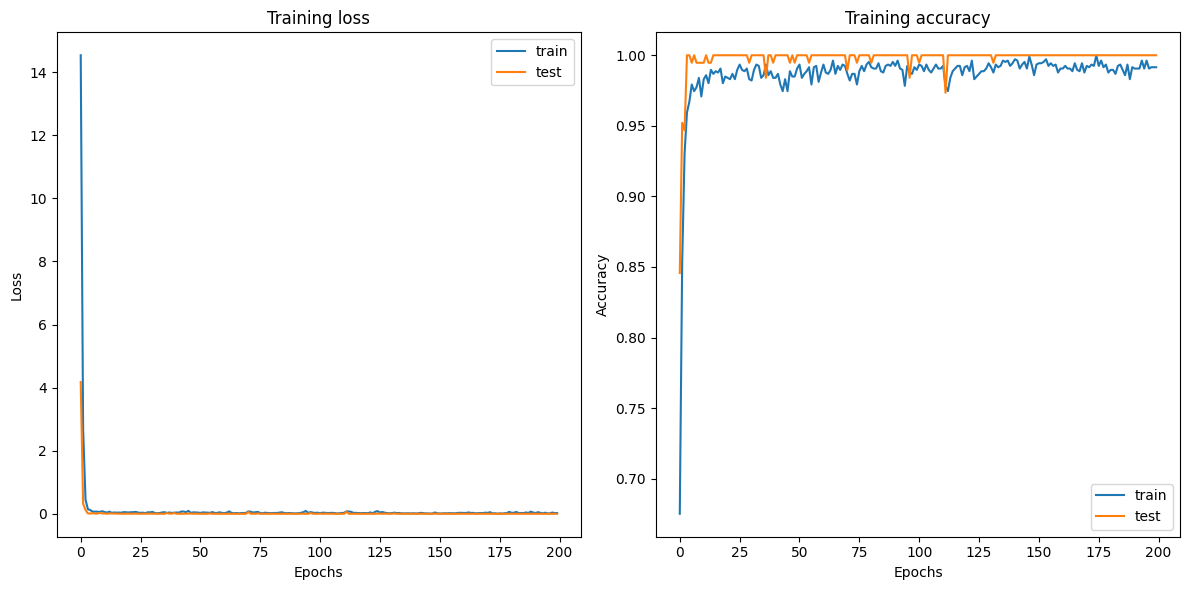

In [ ]:
import matplotlib.pyplot as plt
#学習状況のプロット
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs = range(len(loss))

fig,axes = plt.subplots(figsize=(12,6),nrows=1,ncols=2,tight_layout=True)
axes[0].plot(epochs,loss,label="train")
axes[0].plot(epochs,val_loss,label="test")
axes[0].set(xlabel="Epochs",ylabel="Loss",title="Training loss")
axes[0].legend()
axes[1].plot(epochs,acc,label="train")
axes[1].plot(epochs,val_acc,label="test")
axes[1].set(xlabel="Epochs",ylabel="Accuracy",title="Training accuracy")
axes[1].legend()
# fig.savefig("tl_vgg.png")

In [ ]:
# モデルの評価
model.evaluate(X2_test,y2_test)

6/6 [==============================] - 1s 127ms/step - loss: 5.0715e-05 - accuracy: 1.0000


[5.0714923418127e-05, 1.0]

###testデータで実行

In [ ]:
#csvデータからpandasのデータフレームを取得
import numpy as np
import pandas as pd

test = pd.read_csv("sample_submission.csv",encoding="SHIFT_JIS",names=["test_id","test_target"])

test.head()

,test_id,test_target
0,19871.jpeg,0
1,29934.jpeg,0
2,39826.jpeg,0
3,49888.jpeg,0
4,59918.jpeg,0


In [ ]:
#念のため
test

,test_id,test_target
0,19871.jpeg,0
1,29934.jpeg,0
2,39826.jpeg,0
3,49888.jpeg,0
4,59918.jpeg,0
...,...,...
95,969983.jpeg,0
96,979891.jpeg,0
97,989921.jpeg,0
98,999921.jpeg,0


In [ ]:
test['test_target']=test['test_target'].astype(str)
#データフレームからリスト情報を取得
test_id_list = test['test_id'].to_list()
test_target_list = test['test_target'].to_list()

test_images = []
test_target_label = []

In [ ]:
import cv2

for (path,t) in zip(test_id_list,test_target_list):
    test_img = cv2.imread('./test_data/'+path)
    if test_img is not None:
        test_dst = cv2.resize(test_img, dsize=(200, 200))
        test_im_rgb = cv2.cvtColor(test_dst, cv2.COLOR_BGR2RGB)

        test_images.append(test_im_rgb.astype(np.float32))
        test_target_label.append(t)
    else:
        print(path+' : Failed to load.')


test_np_image = np.array(test_images)

# 画像とラベルの照合
if len(test_np_image) == len(test_target_label):
    print('Successfully loaded.')
else:
    print('Different array lengths.')

Successfully loaded.


####ラベルデータの確認

In [ ]:
test_target_label

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0']

In [ ]:
import numpy as np
len(test_target_label)

100

In [ ]:
test_np_image

array([[[[189., 189., 189.],
         [189., 189., 189.],
         [189., 189., 189.],
         ...,
         [186., 186., 186.],
         [186., 186., 186.],
         [186., 186., 186.]],

        [[188., 188., 188.],
         [188., 188., 188.],
         [189., 189., 189.],
         ...,
         [186., 186., 186.],
         [186., 186., 186.],
         [186., 186., 186.]],

        [[187., 187., 187.],
         [188., 188., 188.],
         [188., 188., 188.],
         ...,
         [186., 186., 186.],
         [185., 185., 185.],
         [185., 185., 185.]],

        ...,

        [[143., 143., 143.],
         [143., 143., 143.],
         [143., 143., 143.],
         ...,
         [152., 152., 152.],
         [152., 152., 152.],
         [151., 151., 151.]],

        [[143., 143., 143.],
         [143., 143., 143.],
         [143., 143., 143.],
         ...,
         [152., 152., 152.],
         [152., 152., 152.],
         [151., 151., 151.]],

        [[143., 143., 143.],
       

####testデータを整形

In [ ]:
#正規化前のデータを作成
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

num_classes = 2
im_rows = 200
im_cols = 200
in_shape = (im_rows, im_cols, 3)

test_Np_image = np.array(test_np_image).astype("float32")
test_Target_label = np.array(test_target_label).astype("int16")

#Target_labelをOne hot encoding する
test_Target_label = to_categorical(test_Target_label, num_classes)

Ans = []
print(len(test_Np_image))
print(len(test_Target_label))

100
100


####testデータで予測

In [ ]:
# 既存のモデルを使用して予測
predictions = model.predict(test_Np_image, batch_size=32, verbose=1)

# 予測結果からクラスを求める
predicted_classes = np.argmax(predictions, axis=1)

# One hot encoding された予測結果をもとに戻す
predicted_classes = predicted_classes.astype('int16')

# Ansに格納
Ans = predicted_classes.tolist()

# 結果を表示
print(Ans)

4/4 [==============================] - 1s 479ms/step
[1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0]


In [ ]:
#csvデータ出力前に確認
Ans_df = pd.DataFrame(data={'test_id':test["test_id"], 'predict': Ans})

Ans_df

,test_id,predict
0,19871.jpeg,1
1,29934.jpeg,1
2,39826.jpeg,1
3,49888.jpeg,0
4,59918.jpeg,1
...,...,...
95,969983.jpeg,0
96,979891.jpeg,0
97,989921.jpeg,1
98,999921.jpeg,0


In [ ]:
#CSVに出力
Ans_df.to_csv("submit_Vgg16.csv", index = False, header = False)

###結果・考察

出力結果の評価は以下の画像に添付した。

VGG16モデルでは、損失率：5.0715e-05、正答率: 1.0000の結果に収まった。

このことから、学習データの改善だけではモデル精度の向上には限度があり、優秀な学習モデルを活用して転移学習したことにより評価が1位タイのものとなったと考えられた。

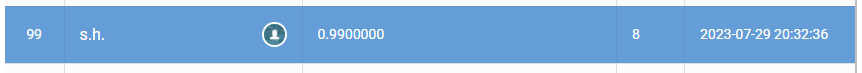

#＜まとめ＞

今回は、SIGNATEの【練習問題】鋳造製品の欠陥検出（ https://signate.jp/competitions/406/data ）を取り組み、授業内で用いた手法で学習モデルを作成し、モデル精度向上に努めた。

最初に学習させたCNNモデルでは、callbackしていたものの学習データ不足が原因で過学習を起こしていた。
これを受け、次にデータの水増しを行い、同モデルに学習させたところ、精度が7飛躍的に向上し、スコアも上昇した。
だが、上位層には届かず、学習モデルの改善の必要があると考え、最終的にVGG16を用いた転移学習を行った。これにより、1位タイのスコアを収めることができた。

学習データ、学習モデルの両観点から改善することができたため、良い成果を出せたと思われる。